In [1]:

import cv2
import numpy as np
import random
import rpack
from fractions import Fraction
from math import prod

sizes, processed_images, processed = None, None, None

def resize_guide(image_size, unit_shape, target_ratio):
    aspect_ratio = Fraction(*image_size).limit_denominator()
    horizontal = aspect_ratio.numerator
    vertical = aspect_ratio.denominator
    target_area = prod(unit_shape) * target_ratio
    unit_length = (target_area/(horizontal*vertical))**.5
    return (int(horizontal*unit_length), int(vertical*unit_length))

def make_border(image, value, border=16):
    return cv2.copyMakeBorder(
        image,
        top=border,
        bottom=border,
        left=border,
        right=border,
        borderType=cv2.BORDER_CONSTANT,
        value=value
    )

def rotate_image(image, angle):
    h, w = image.shape[:2]
    cX, cY = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D((cX, cY), -angle, 1.0)
    cos = np.abs(M[0, 0])
    sin = np.abs(M[0, 1])
    nW = int((h * sin) + (w * cos))
    nH = int((h * cos) + (w * sin))
    M[0, 2] += (nW / 2) - cX
    M[1, 2] += (nH / 2) - cY
    return cv2.warpAffine(image, M, (nW, nH))

def make_collage(image_files, output_file,
        exponent=0.8, border=16, max_degree=15, unit_shape=(1280,720),
        resize_images=False, image_border=True, rotate_images=True, limit_shape=False):
    images = [cv2.imread(name) for name in image_files]
    size_hint = [exponent**i for i in range(len(images))]
    
    if resize_images:
        resized_images = []
        for image, hint in zip(images, size_hint):
            height, width = image.shape[:2]
            guide = resize_guide((width, height), unit_shape, hint)
            print(guide)
            resized = cv2.resize(image, guide, interpolation = cv2.INTER_AREA)
            if image_border:
                resized = make_border(resized, (255, 255, 255), border)
            resized_images.append(resized)
        images = resized_images
    else:
        sorted_images = []
        for image in sorted(images, key=lambda x: -prod(x.shape[:2])):
            if image_border:
                image = make_border(image, (255, 255, 255), border)
            sorted_images.append(image)
        images = sorted_images
    
    global sizes
    global processed_images
    global processed
    
    sizes = []
    processed_images = []
    for image in images:
        if rotate_images:
            image = rotate_image(image, random.randrange(-max_degree, max_degree+1))
        processed = make_border(image, (0,0,0), border)
        processed_images.append(processed)
        height, width = processed.shape[:2]
        sizes.append((width, height))
        
    if limit_shape:
        max_side = int((sum([w*h for w, h in sizes])*2)**.5)
        packed = rpack.pack(sizes, max_width=max_side, max_height=max_side)
    else:
        packed = rpack.pack(sizes)
    
    shapes = [(x, y, w, h) for (x, y), (w, h) in zip(packed, sizes)]
    rightmost = sorted(shapes, key=lambda x: -x[0] - x[2])[0]
    bound_width = rightmost[0] + rightmost[2]
    downmost = sorted(shapes, key=lambda x: -x[1] - x[3])[0]
    bound_height = downmost[1] + downmost[3]
    
    collage = np.zeros([bound_height, bound_width, 3],dtype=np.uint8)
    for image, (x, y, w, h) in zip(processed_images, shapes):
        collage[y:y+h, x:x+w] = image
    
    collage = cv2.GaussianBlur(collage, (3,3), cv2.BORDER_DEFAULT)
    cv2.imwrite(output_file, collage)

In [2]:
from pathlib import Path                                                  
                                                                          
files = [str(i) for i in Path('Examples5').glob('*')]                   
                                                                          
make_collage(files[::-1], 'runs/'+random.randbytes(6).hex()+'.png')

In [3]:
sizes

[(2100, 2707),
 (1822, 2547),
 (1781, 2243),
 (1967, 2411),
 (1750, 2163),
 (1511, 2178),
 (1397, 2210),
 (1345, 2295),
 (1840, 1407),
 (1435, 1593),
 (1259, 1589),
 (1833, 1368),
 (1273, 1798),
 (1632, 1031),
 (1354, 1300),
 (1440, 1200),
 (1285, 1255),
 (1242, 1016),
 (939, 1171),
 (770, 973),
 (405, 1791),
 (722, 777),
 (601, 880),
 (613, 847),
 (669, 881),
 (716, 896),
 (649, 861),
 (646, 848),
 (687, 828),
 (627, 787),
 (654, 789),
 (685, 847),
 (521, 800),
 (574, 760),
 (677, 786),
 (617, 830),
 (647, 660),
 (598, 817),
 (666, 706),
 (458, 702),
 (652, 659),
 (617, 681),
 (601, 719),
 (513, 681),
 (515, 654),
 (615, 618),
 (498, 672),
 (503, 757),
 (452, 715),
 (669, 445),
 (654, 456),
 (725, 524),
 (593, 567),
 (563, 686),
 (464, 682),
 (673, 392),
 (666, 478),
 (570, 470),
 (576, 414),
 (585, 433),
 (577, 424),
 (507, 640),
 (563, 392),
 (598, 465),
 (626, 515),
 (624, 516),
 (574, 528),
 (620, 486),
 (571, 427),
 (427, 551),
 (576, 435),
 (622, 472),
 (563, 439),
 (584, 493),


In [ ]:
sizes = [(1921, 2610), (1935, 2611), (1816, 2269), (1905, 2372), (1816, 2212), (1844, 2377), (1779, 2416), (1745, 2490), (1840, 1407), (1597, 1725), (1235, 1570), (1845, 1392), (1418, 1865), (1722, 1207), (1184, 1117), (1290, 984), (1285, 1255), (1286, 1082), (1033, 1233), (914, 1075), (496, 1805), (806, 852), (628, 896), (573, 822), (680, 887), (610, 832), (661, 868), (635, 841), (687, 828), (569, 745), (611, 758), (551, 765), (547, 815), (562, 752), (637, 758), (583, 812), (579, 595), (533, 789), (659, 700), (616, 789), (569, 578), (617, 681), (601, 719), (533, 695), (555, 684), (653, 656), (488, 665), (556, 781), (539, 760), (754, 595), (698, 527), (739, 553), (653, 632), (539, 672), (483, 692), (730, 515), (639, 430), (564, 461), (628, 498), (585, 433), (583, 432), (507, 640), (592, 436), (553, 397), (601, 469), (624, 516), (579, 534), (593, 438), (566, 418), (444, 563), (622, 513), (586, 405), (568, 447), (539, 426), (621, 472), (580, 398), (565, 382), (572, 493), (586, 401), (536, 443), (523, 474), (598, 412), (591, 473), (521, 374), (551, 464), (515, 436), (442, 608), (549, 394), (537, 468), (530, 468), (493, 509), (610, 457), (564, 325), (566, 354), (557, 323), (592, 452), (545, 469), (505, 476), (570, 450), (548, 444), (556, 322), (433, 501), (468, 368), (550, 321), (600, 377), (427, 427), (402, 403), (514, 360), (563, 354), (499, 421), (467, 426), (514, 387), (488, 330), (363, 445), (464, 327), (380, 440), (412, 334), (520, 276), (517, 267), (400, 405), (348, 426), (401, 430), (414, 373), (558, 297), (328, 367), (426, 368), (498, 284), (377, 382), (329, 425), (459, 306), (346, 390), (358, 273), (355, 315), (252, 345), (254, 342), (289, 378), (295, 342), (545, 213), (256, 306), (284, 294), (248, 292), (191, 274), (198, 319), (244, 240), (212, 262), (180, 258), (152, 277), (232, 191), (194, 269), (283, 141), (140, 202)]

len(sizes)

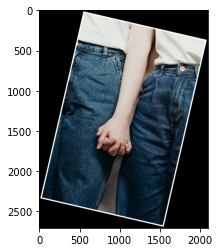

In [9]:
import matplotlib.pyplot as plt
plt.imshow(cv2.cvtColor(processed_images[0], cv2.COLOR_RGB2BGR))